# MNIST

In [1]:
import tensorflow as tf
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_size=28
num_channels=1
num_labels=10

## O que eh "one_hot" ?

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## conjuntos de treinamento, validacao e teste

In [4]:
print mnist.train.images.shape
print mnist.validation.images.shape
print mnist.test.images.shape

(55000, 784)
(5000, 784)
(10000, 784)


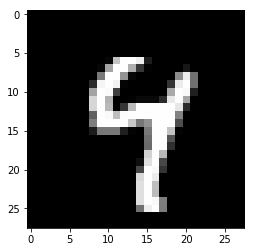

In [5]:
plt.imshow(mnist.train.images[2].reshape((image_size, image_size)), cmap='gray')

In [6]:
mnist.train.labels[2]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [20]:
x = tf.placeholder(tf.float32, [None, 784])

W1 = tf.Variable(tf.zeros([784, 10]))
b1 = tf.Variable(tf.zeros([10]))
logits = tf.matmul(x, W1) + b1

y = tf.placeholder(tf.float32, [None, 10])

In [21]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))

In [22]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [23]:
batch_size = 100

In [24]:
sess = tf.InteractiveSession()

In [25]:
tf.global_variables_initializer().run()

## Epocas

In [26]:
for epoch in range(10):
    for step in range(mnist.train.images.shape[0]//batch_size):
        batch = mnist.train.next_batch(batch_size)
        sess.run(train_step, feed_dict={x: batch[0], y : batch[1]})

In [27]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(logits, 1))

In [28]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [29]:
print(sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))

0.9027


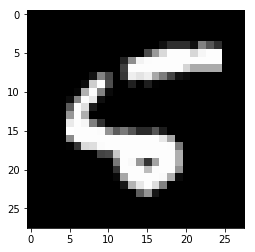

In [40]:
plt.imshow(mnist.test.images[8].reshape((image_size, image_size)), cmap='gray')

In [41]:
print(sess.run([tf.arg_max(logits,1)], feed_dict={x:mnist.test.images[8:9]})[0][0])

6
